In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle


Using TensorFlow backend.


In [2]:
data = pd.read_csv('Concrete_Data_Yeh.csv')
data = shuffle(data)


In [3]:
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
1020,288.4,121.0,0.0,177.4,7.0,907.9,829.5,28,42.14
900,150.0,237.0,0.0,174.0,12.0,1069.0,675.0,28,37.43
553,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42
326,252.3,0.0,98.8,146.3,14.2,987.8,889.0,28,50.60
545,255.0,0.0,0.0,192.0,0.0,889.8,945.0,28,18.75


In [4]:
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
print("Null values check ", data.columns[data.isna().any()].tolist())

Null values check  []


In [6]:
print('Data Size ', data.shape)

Data Size  (1030, 9)


cement Distribution  AxesSubplot(0.125,0.125;0.775x0.755)
slag Distribution  AxesSubplot(0.125,0.125;0.775x0.755)
flyash Distribution  AxesSubplot(0.125,0.125;0.775x0.755)
water Distribution  AxesSubplot(0.125,0.125;0.775x0.755)
superplasticizer Distribution  AxesSubplot(0.125,0.125;0.775x0.755)
coarseaggregate Distribution  AxesSubplot(0.125,0.125;0.775x0.755)
fineaggregate Distribution  AxesSubplot(0.125,0.125;0.775x0.755)
age Distribution  AxesSubplot(0.125,0.125;0.775x0.755)
csMPa Distribution  AxesSubplot(0.125,0.125;0.775x0.755)


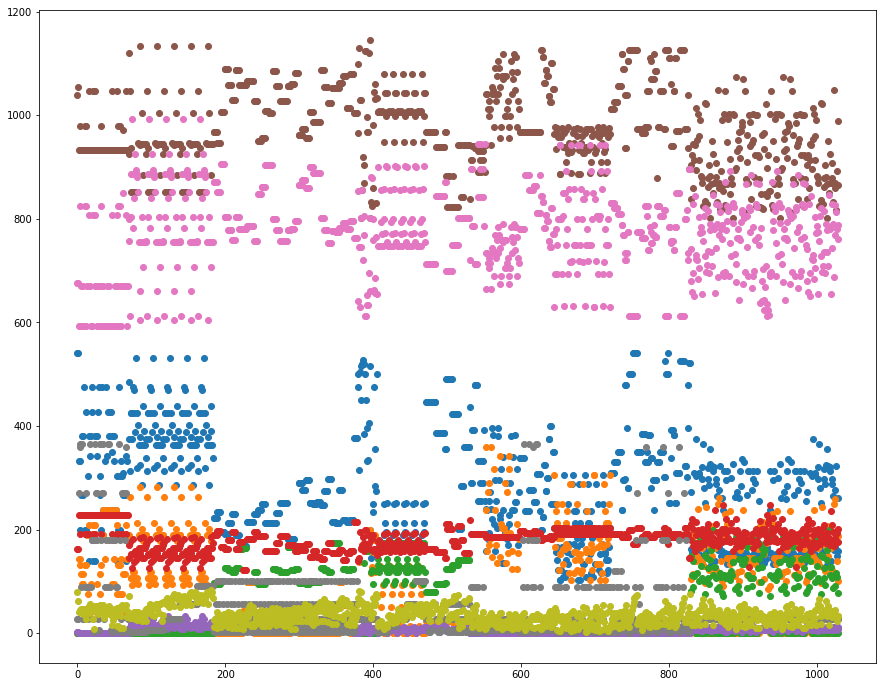

In [7]:
## print(data.columns)
for coloumn in data.columns:
    print(coloumn + ' Distribution ', data[coloumn].plot( style='o', figsize = (15,12)))

In [8]:
training_features = ['cement','slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate',  'fineaggregate', 'age' ]
label_feature = ['csMPa']
selected_feature_data = data

In [9]:
m = data.shape[0]
n = len(training_features)
percentage_of_training = 80
number_example_in_training = int((percentage_of_training * m)/100)
number_example_in_test = int(m - number_example_in_training)

print('number_example_in_training', number_example_in_training)
print('number_example_in_test', number_example_in_test)

training_data_features = selected_feature_data.head(number_example_in_training)[training_features]
training_data_labels = selected_feature_data.head(number_example_in_training)[label_feature]

test_data_features = selected_feature_data.head(number_example_in_test)[training_features]
test_data_labels = selected_feature_data.head(number_example_in_test)[label_feature]


print('shape of traing data features', training_data_features.shape)
print('shape of traing data labels', training_data_labels.shape)
print('shape of test data features', test_data_features.shape)
print('shape of test data features', test_data_labels.shape)

number_example_in_training 824
number_example_in_test 206
shape of traing data features (824, 8)
shape of traing data labels (824, 1)
shape of test data features (206, 8)
shape of test data features (206, 1)


In [10]:
def build_model(learning_rate):

  model = keras.models.Sequential([
    keras.layers.Dense(19, activation=tf.nn.relu,kernel_regularizer= keras.regularizers.l2(0.01),
                       input_shape=(training_data_features.shape[1],)),
    keras.layers.Dense(13, activation=tf.nn.relu, kernel_regularizer= keras.regularizers.l2(0.01)),  
    keras.layers.Dense(7, activation=tf.nn.relu,kernel_regularizer= keras.regularizers.l2(0.01)),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

In [11]:

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 1000 == 0: print('epoch ', epoch,)

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 5])

# Store training stats


epoch  0
Learning Rate  0.0001
[38.29507331477786, 4.57954141005729]
None
Mean Square Error  38.135778239364264
[42.791283] -- [[42.14]]
[32.837708] -- [[37.43]]
[20.500563] -- [[25.42]]
[38.146774] -- [[50.6]]
[19.369686] -- [[18.75]]
epoch  0
Learning Rate  0.0003
[35.971993751896235, 4.357150841685175]
None
Mean Square Error  35.68602171761845
[42.76342] -- [[42.14]]
[30.99619] -- [[37.43]]
[23.322247] -- [[25.42]]
[40.880478] -- [[50.6]]
[20.215115] -- [[18.75]]
epoch  0
Learning Rate  0.0009
[47.60584873829073, 5.218363386913411]
None
Mean Square Error  47.32335684954887
[39.927097] -- [[42.14]]
[30.074965] -- [[37.43]]
[25.603619] -- [[25.42]]
[34.53033] -- [[50.6]]
[11.811397] -- [[18.75]]
epoch  0
Learning Rate  0.001
[22.26815016292831, 3.276138238536501]
None
Mean Square Error  21.782661268589315
[42.327908] -- [[42.14]]
[36.432594] -- [[37.43]]
[24.689226] -- [[25.42]]
[40.924885] -- [[50.6]]
[18.644144] -- [[18.75]]
epoch  0
Learning Rate  0.003
[22.864646541262136, 3.37274

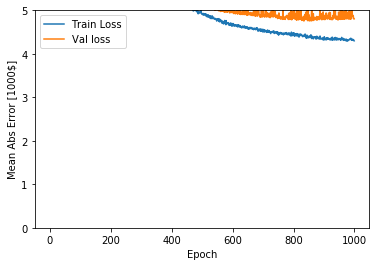

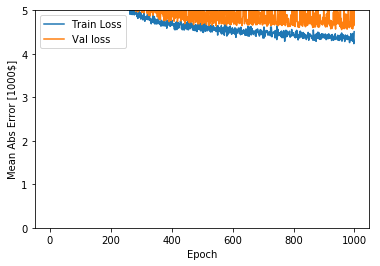

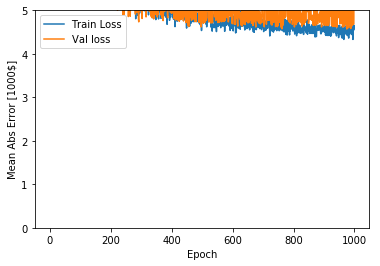

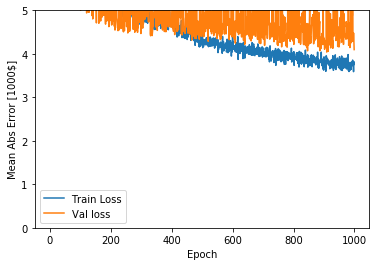

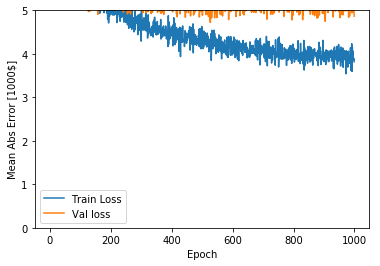

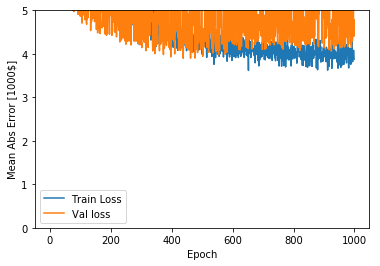

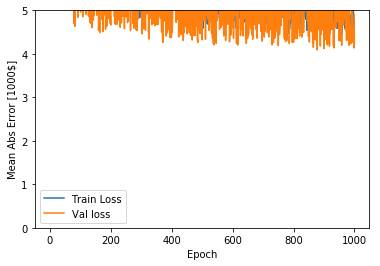

In [12]:


learning_rates = [0.0001, 0.0003, 0.0009, 0.001, 0.003, 0.006, 0.009]
mse = [None] * len(learning_rates)
counter = 0
for learning_rate in learning_rates:
    model = build_model(learning_rate=learning_rate)
#    model.summary()
    EPOCHS = 1000
        
    history = model.fit(training_data_features, training_data_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])        
    print('Learning Rate ', learning_rate)
    print(model.evaluate(test_data_features, test_data_labels, verbose=0))
    print(plot_history(history))
    
    predicted_value = model.predict(test_data_features)
    MSE = mean_squared_error(np.asmatrix(test_data_labels), predicted_value)
    print("Mean Square Error ", MSE)
    mse[counter] = MSE
    counter = counter +1
    for i in range(0,5):
        print(predicted_value[i], "--", np.asmatrix(test_data_labels)[i])
    


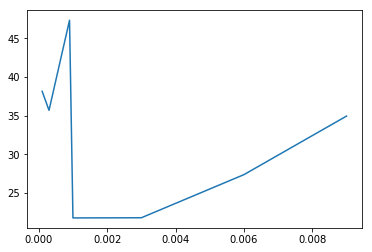

In [13]:
plt.plot(learning_rates, mse)


Till now we have find the learning rate of 0.0003 to be desent learning rate with 3000 epochs
let freez the learning rate and epochs for not.
chnage with model design and regularization value.

epoch  0
epoch  1000
epoch  2000
epoch  3000
epoch  4000
epoch  5000
epoch  6000
epoch  7000
epoch  8000
epoch  9000
epoch  10000
epoch  11000
epoch  12000
epoch  13000
epoch  14000
epoch  15000
epoch  16000
epoch  17000
epoch  18000
epoch  19000
Learning Rate  0.0003
[15.061153522972921, 2.6295833726531095]
None
Mean Square Error  14.252929782999184
[40.911194] -- [[42.14]]
[32.074684] -- [[37.43]]
[24.890146] -- [[25.42]]
[39.567883] -- [[50.6]]
[20.31426] -- [[18.75]]


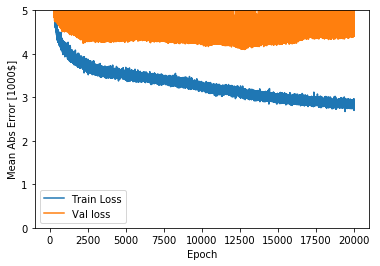

In [18]:
learning_rate = 0.0003
epochs = 20000


model = build_model(learning_rate=learning_rate)
history = model.fit(training_data_features, training_data_labels, epochs=epochs,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])        
print('Learning Rate ', learning_rate)
print(model.evaluate(test_data_features, test_data_labels, verbose=0))
print(plot_history(history))
    
predicted_value = model.predict(test_data_features)
MSE = mean_squared_error(np.asmatrix(test_data_labels), predicted_value)
print("Mean Square Error ", MSE)
for i in range(0,5):
    print(predicted_value[i], "--", np.asmatrix(test_data_labels)[i])

